In [59]:
import pandas
import pycaret

In [60]:
filename = "Data_v2.csv"

In [61]:
csv = pandas.read_csv(filename)
csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN

csv = csv.drop('Lmt',axis=1)
csv = csv.drop('Lmr',axis=1)
csv = csv.drop('Llk',axis=1)
csv = csv.drop('Rt',axis=1)
#csv = csv.drop('Rr',axis=1)

dataset = csv
dataset

,l1,l2,h1,w1,Rr
0,28,87,135,194,29.474158
1,28,53,143,126,19.844928
2,35,56,142,34,5.039742
3,18,87,75,177,18.963522
4,20,98,77,164,18.409615
...,...,...,...,...,...
982,11,70,116,76,3.750356
983,18,88,92,52,4.407051
984,25,95,90,167,23.749820
985,23,68,71,131,20.791246


In [62]:
data = dataset.sample(frac=0.7, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (691, 5)
Unseen Data For Predictions: (296, 5)


In [63]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Rr', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Rr
2,Original Data,"(691, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(483, 4)"


In [64]:
top3 = compare_models(n_select = 3) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5602,5.1471,2.2302,0.9862,0.1016,0.0857,0.0230
et,Extra Trees Regressor,1.5091,5.3295,2.2729,0.9857,0.0885,0.0772,0.0740
lightgbm,Light Gradient Boosting Machine,1.6295,6.2043,2.4535,0.9834,0.1052,0.0878,0.0140
rf,Random Forest Regressor,1.8681,7.6923,2.7350,0.9795,0.1089,0.0965,0.0940
dt,Decision Tree Regressor,3.1267,21.5287,4.5629,0.9427,0.1859,0.1647,0.0060
ada,AdaBoost Regressor,3.9836,24.4898,4.9186,0.9336,0.3243,0.3572,0.0350
knn,K Neighbors Regressor,4.2135,38.5431,6.1682,0.8952,0.2382,0.2258,0.0070
lr,Linear Regression,5.8603,58.9694,7.6475,0.8390,0.4474,0.6804,0.0150
lasso,Lasso Regression,5.8578,58.9866,7.6486,0.8390,0.4447,0.6746,0.0060
en,Elastic Net,5.8582,58.9779,7.6480,0.8390,0.4448,0.6754,0.0060


In [65]:
tuned_top3 = [tune_model(i) for i in top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.3778,72.5028,8.5149,0.8473,0.5530,0.7365
1,5.7735,55.8546,7.4736,0.8634,0.4579,0.5198
2,6.0112,54.2164,7.3632,0.8106,0.5267,0.9103
3,5.9743,68.7830,8.2936,0.8137,0.5066,0.5072
4,5.0708,52.5051,7.2460,0.8586,0.4948,0.5077
5,5.7978,61.3446,7.8323,0.8164,0.5422,0.6022
6,4.7980,45.7759,6.7658,0.8700,0.4907,0.3769
7,5.0404,43.9950,6.6329,0.8814,0.4247,0.5331
8,7.0669,84.3968,9.1868,0.7943,0.4642,0.6382
9,5.5693,56.3753,7.5084,0.8284,0.3880,0.4772


In [66]:
bagged_top3 = [ensemble_model(i) for i in tuned_top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.2294,51.5864,7.1824,0.8913,0.4408,0.5772
1,4.4169,34.1878,5.8470,0.9164,0.3797,0.3715
2,3.9798,25.7510,5.0745,0.9100,0.4554,0.6413
3,4.3956,42.8289,6.5444,0.8840,0.3920,0.3781
4,3.7829,35.1578,5.9294,0.9053,0.4464,0.3694
5,4.6729,42.1233,6.4902,0.8740,0.4134,0.4440
6,3.6173,25.1441,5.0144,0.9286,0.2804,0.2672
7,3.7510,26.3165,5.1300,0.9291,0.3035,0.4159
8,5.3937,52.1737,7.2231,0.8728,0.4483,0.4677
9,4.3393,35.9467,5.9956,0.8906,0.3068,0.3600


In [67]:
blender = blend_models(estimator_list = top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4597,5.4135,2.3267,0.9886,0.0810,0.0683
1,1.5073,4.4042,2.0986,0.9892,0.1022,0.0869
2,1.1208,2.3227,1.5240,0.9919,0.0836,0.0731
3,1.8115,7.1185,2.6680,0.9807,0.0887,0.0703
4,1.1406,2.5544,1.5982,0.9931,0.0739,0.0655
5,1.1023,4.8340,2.1986,0.9855,0.0663,0.0561
6,1.5343,4.6213,2.1497,0.9869,0.0903,0.0760
7,1.1763,2.9975,1.7313,0.9919,0.0782,0.0663
8,1.6278,6.9447,2.6353,0.9831,0.0804,0.0719
9,1.1946,3.8648,1.9659,0.9882,0.0719,0.0611


In [68]:
best5 = automl(optimize = 'RMSE')

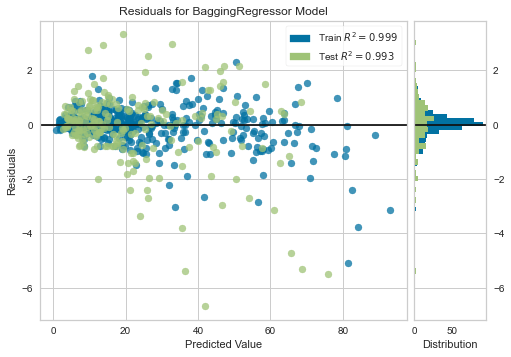

In [69]:
plot_model(best5)

In [70]:
best5

BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                          ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.3,
                                                          loss='ls',
                                                          max_depth=5,
                                                          max_features=1.0,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0005,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=3,
                                                          min_samples_split=7,
     

In [107]:
parm = [[26,54,74,51]]

solution1 = best1.predict(parm)
solution2 = best2.predict(parm)
solution3 = best3.predict(parm)
solution4 = best4.predict(parm)
solution5 = best5.predict(parm)
f',{solution1[0]},{solution2[0]},{solution3[0]},{solution4[0]},{solution5[0]},0,0,0,0,0'


',0.5548146679117484,0.552671606981129,1.6838325494900346,7.6719866220151145,8.384990507284908,0,0,0,0,0'